In [56]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
%matplotlib inline

In [26]:
california_data = fetch_california_housing()                                                  #viev dataset
california_df = pd.DataFrame(california_data.data, columns=california_data.feature_names) 
target = california_data.target
print(california_df[:3], target[:3])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24   [4.526 3.585 3.521]


In [27]:
X,y = fetch_california_housing(return_X_y = True)                    #load
print('Data: ')
print(X[:3])
print('Data label: ')
print(y[:3])

Data: 
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]
Data label: 
[4.526 3.585 3.521]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)   #sample split

In [23]:
scaler = StandardScaler().fit(X_train)                             #standardization
standardized_X = scaler.transform(X_train)
print('Before standardization: ')
print(X_train[:3])
print('After standardization: ')
print(standardized_X[:3])

Before standardization: 
[[ 4.23860000e+00  6.00000000e+00  7.72307692e+00  1.16923077e+00
   2.28000000e+02  3.50769231e+00  3.38300000e+01 -1.17550000e+02]
 [ 4.38980000e+00  5.20000000e+01  5.32662192e+00  1.10067114e+00
   1.48500000e+03  3.32214765e+00  3.77300000e+01 -1.22440000e+02]
 [ 3.93330000e+00  2.60000000e+01  4.66847826e+00  1.04619565e+00
   1.02200000e+03  2.77717391e+00  3.38300000e+01 -1.18000000e+02]]
After standardization: 
[[ 0.19001247 -1.79507596  0.90771428  0.1492426  -1.04760128  0.07408222
  -0.8400624   1.00389865]
 [ 0.26931072  1.85553889 -0.04200187  0.00918616  0.05210918  0.04527606
   0.98536392 -1.43477229]
 [ 0.02989505 -0.20785212 -0.30282448 -0.10209862 -0.35295521 -0.03933216
  -0.8400624   0.77948108]]


In [8]:
scaler = Normalizer().fit(X_test)                               #normalization
normalized_X = scaler.transform(X_test)
print('Before normalization: ')
print(X_test[:3])
print('After normalization: ')
print(normalized_X[:3])

Before normalization: 
[[ 4.15180000e+00  2.20000000e+01  5.66307278e+00  1.07547170e+00
   1.55100000e+03  4.18059299e+00  3.25800000e+01 -1.17050000e+02]
 [ 5.77960000e+00  3.20000000e+01  6.10722611e+00  9.27738928e-01
   1.29600000e+03  3.02097902e+00  3.39200000e+01 -1.17970000e+02]
 [ 4.34870000e+00  2.90000000e+01  5.93071161e+00  1.02621723e+00
   1.55400000e+03  2.91011236e+00  3.86500000e+01 -1.21840000e+02]]
After normalization: 
[[ 2.66837366e-03  1.41394625e-02  3.63967297e-03  6.91208717e-04
   9.96832108e-01  2.68687900e-03  2.09392586e-02 -7.52283676e-02]
 [ 4.43825224e-03  2.45733393e-02  4.68984185e-03  7.12426357e-04
   9.95220241e-01  2.31986070e-03  2.60477396e-02 -9.05911511e-02]
 [ 2.78845365e-03  1.85952482e-02  3.80286394e-03  6.58026347e-04
   9.96448817e-01  1.86600902e-03  2.47829773e-02 -7.81256910e-02]]


In [30]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)    #model training SGD Regression
linear_regression_model.fit(X_train, y_train)

train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 2.762889186490957e+30
Test MSE: 2.660682292866344e+30


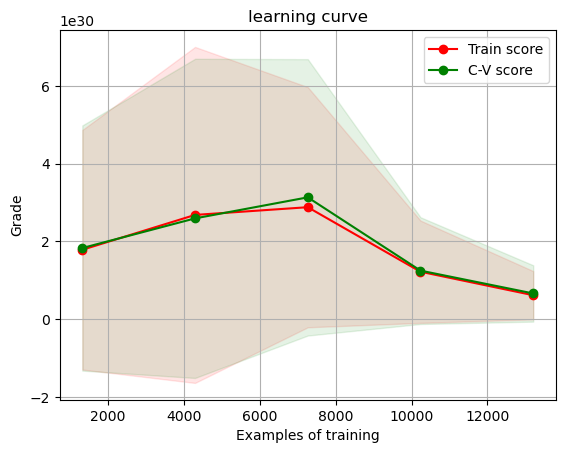

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,       #learning curve between training and cross-validation
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Examples of training")
    plt.ylabel("Grade")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linear_regression_model, 
                    "learning curve", 
                    X_train, 
                    y_train, 
                    cv=5);

In [38]:
x = [[7.8, 32, 7, 1, 475, 2, 32, -122]]                                          #testing the model
res = linear_regression_model.predict(x)
print(res)

[3.49012617e+14]


In [48]:
linear_regression_model.fit(normalized_X, y_test)                                #interpreting model weights
sorted(list(zip(california_df.columns, linear_regression_model.coef_)), 
       key=lambda x: abs(x[1]))

[('AveBedrms', -0.0003224578741020808),
 ('AveOccup', -0.004934055430702889),
 ('AveRooms', 0.028426436253455173),
 ('Latitude', 0.05818273110080142),
 ('MedInc', 0.09268503932155288),
 ('HouseAge', 0.15102173890603565),
 ('Longitude', -0.28267765646702675),
 ('Population', 0.9573449679217212)]

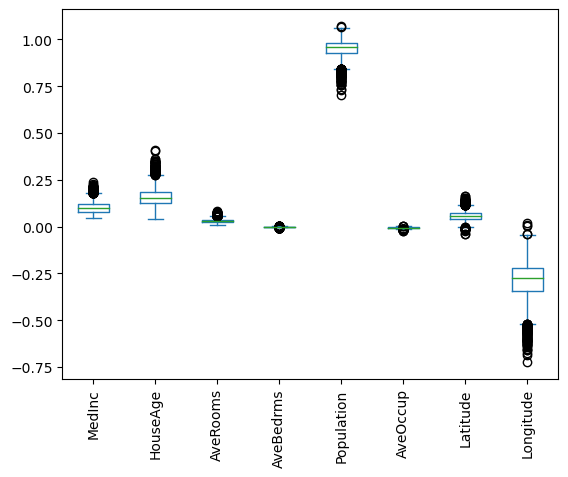

In [55]:
#in machine learning it is very useful to have a confidence interval around our estimates

from sklearn.utils import resample                                  

n_bootstraps = 10000 
bootstrap_X = [] 
bootstrap_y = [] 

for _ in range(n_bootstraps): 
    sample_X, sample_y = resample(normalized_X, y_test)
    bootstrap_X.append(sample_X) 
    bootstrap_y.append(sample_y)

coeffs = [] 

for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)
    
coef_df = pd.DataFrame(coeffs, columns=california_df.columns) 
coef_df.plot(kind='box') 
plt.xticks(rotation=90);

In [58]:
filename = 'california_houses.sav'
joblib.dump(linear_regression_model, filename)

['california_houses.sav']